In [24]:
# Importing libs
import numpy as np
import pandas as pd
import seaborn as sns

In [25]:
"""Quality of Analysis"""
# Questions about data
# I would like to know if Salaries are related to Fame, so I will analysis two files Salaries.csv and HallOfFame.csv

# read data into Pandas DataFrames
salaries = pd.read_csv('Salaries.csv',index_col='playerID')
hallOfFame = pd.read_csv('HallOfFame.csv', index_col='playerID')

# Are the players with big salaries in the Hall of Fame
# Are the players with small salaries in the Hall of Fame

Populating the interactive namespace from numpy and matplotlib


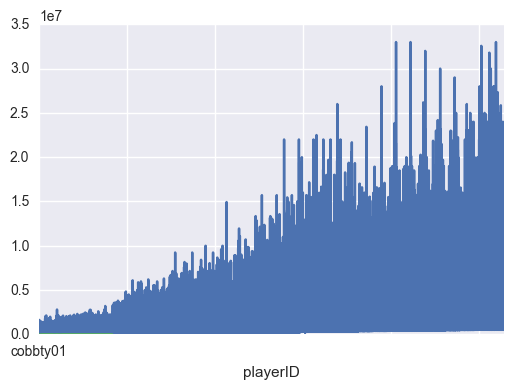

In [31]:
"""Data Wrangling Phase"""
# Changes that were made to clean the data, such as merging files, handling missing values

# The Data is so big, and first I discovered that the salaries increases over the years
%pylab inline
salaries['salary'].plot()

In [35]:
# I will concentrate my analysis in the last 10 years
salariesLast10years = pd.DataFrame

for salary in salaries:
    if salary.yearID >= 2006:
        salariesLast10years.add(salary['yearID'])


NameError: name 'i' is not defined

In [9]:
"""Exploration Phase"""
# Investigate the stated question(s) from multiple angles. 3 variables 1D and 2D

'Exploration Phase'

In [10]:
# Plots

In [11]:
"""Conclusions Phase"""

'Conclusions Phase'

In [12]:
"""Communication"""

'Communication'

Populating the interactive namespace from numpy and matplotlib


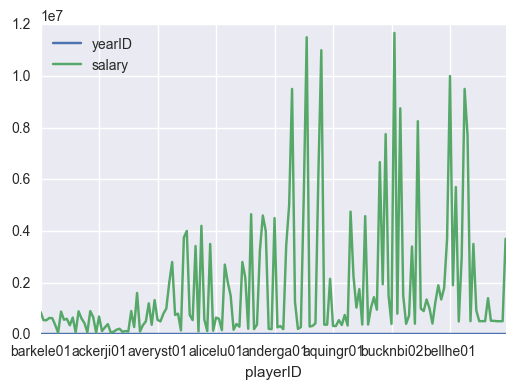

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns

salaries = pd.read_csv('Salaries.csv',index_col='playerID')
hallOfFame = pd.read_csv('HallOfFame.csv', index_col='playerID')

%pylab inline

salaries.groupby('yearID').head().plot()